In [54]:

import pandas as pd

clickstream_df=pd.read_csv('All_Clickstream.csv')
device_df=pd.read_csv('All_Devices.csv')
profiles_df=pd.read_csv('All_Profiles.csv')
searchhistory_df=pd.read_csv('All_SearchHistory.csv')
viewingactivity_df=pd.read_csv('All_ViewingActivity.csv')



In [55]:
del clickstream_df['Referrer Url'] 
del clickstream_df['Webpage Url']
clickstream_df.head()

,Profile Name,Source,Navigation Level,Click Utc Ts
0,User 4,Source 0,signupPrompt,2022-10-08 14:04:47
1,User 4,Source 0,browseTitles,2022-10-08 14:04:46
2,User 4,Source 1,movieDetails,2022-09-30 14:53:50
3,User 4,Source 1,browseTitles,2022-09-30 14:53:50
4,User 4,Source 1,movieDetails,2022-09-30 14:53:49


In [56]:
print(clickstream_df.isnull().sum())

Profile Name        0
Source              0
Navigation Level    0
Click Utc Ts        0
dtype: int64


In [57]:
device_df.drop(['Acct First Playback Date For User Generated Plays','Acct Last Playback Date For User Generated Plays','Profile First Playback Date For User Generated Plays','Profile Last Playback Date For User Generated Plays','Profile First Playback Date','Profile Last Playback Date','Deactivation Time'], axis=1, inplace=True)
device_df.head(5)
device_df.dropna(inplace=True)

In [58]:
print(device_df.isnull().sum())

Profile Name                0
Esn                         0
Device Type                 0
Acct First Playback Date    0
Acct Last Playback Date     0
dtype: int64


In [59]:
profiles_df.drop(['Game Handle','Primary Lang','Max Stream Quality','Profile Lock Enabled','Profile Transferred','Profile Transfer Time','Profile Transferred From Account','Profile Transferred To Account','Date Of Birth','Gender','Opt-Out','Privacy And Data Settings'], axis=1, inplace=True)


In [60]:
profiles_df=profiles_df.fillna(0)
profiles_df.head()

,Profile Name,Profile Creation Time,Maturity Level,Has Auto Playback
0,User 0,29-10-2021 05:42,ADULTS,1.0
1,User 1,29-10-2021 05:42,ADULTS,1.0
2,User 2,29-10-2021 05:42,ADULTS,1.0
3,User 3,29-10-2021 05:42,ADULTS,1.0
4,User 4,29-10-2021 05:19,ADULTS,0.0


In [61]:
searchhistory_df.drop(['Device', 'Is Kids'], axis=1, inplace=True)
searchhistory_df.head()

,Profile Name,Country Iso Code,Query Typed,Displayed Name,Action,Section,Utc Timestamp
0,User 4,AE,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19
1,User 4,AE,NaN,NaN,select,prequery_results,2022-08-01 13:59:18
2,User 4,AE,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07
3,User 4,AE,NaN,NaN,select,prequery_results,2022-08-01 13:59:03
4,User 4,AE,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23


In [62]:
import numpy as np
searchhistory_df['Combined data']=searchhistory_df['Query Typed'].fillna('')+ ' ' + searchhistory_df['Displayed Name'].fillna('')

searchhistory_df.head()

,Profile Name,Country Iso Code,Query Typed,Displayed Name,Action,Section,Utc Timestamp,Combined data
0,User 4,AE,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19,"Manifest: Season 1: ""Pilot"""
1,User 4,AE,NaN,NaN,select,prequery_results,2022-08-01 13:59:18,
2,User 4,AE,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07,"Manifest: Season 1: ""Pilot"""
3,User 4,AE,NaN,NaN,select,prequery_results,2022-08-01 13:59:03,
4,User 4,AE,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23,the gray The Gray Man


In [63]:
searchhistory_df.drop(['Query Typed', 'Displayed Name'], axis=1, inplace=True)
searchhistory_df['Combined data']=searchhistory_df['Combined data'].replace(' ', np.nan)
searchhistory_df.head()

,Profile Name,Country Iso Code,Action,Section,Utc Timestamp,Combined data
0,User 4,AE,play,prequery_results,2022-08-01 13:59:19,"Manifest: Season 1: ""Pilot"""
1,User 4,AE,select,prequery_results,2022-08-01 13:59:18,NaN
2,User 4,AE,play,prequery_results,2022-08-01 13:59:07,"Manifest: Season 1: ""Pilot"""
3,User 4,AE,select,prequery_results,2022-08-01 13:59:03,NaN
4,User 4,AE,add,title_results,2022-07-17 13:59:23,the gray The Gray Man


In [64]:
print(searchhistory_df.isnull().sum())

Profile Name          0
Country Iso Code      0
Action                0
Section               0
Utc Timestamp         0
Combined data       330
dtype: int64


In [65]:
searchhistory_df.dropna(inplace=True)
print(searchhistory_df.isnull().sum())

Profile Name        0
Country Iso Code    0
Action              0
Section             0
Utc Timestamp       0
Combined data       0
dtype: int64


In [66]:
print(searchhistory_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2286 entries, 0 to 2615
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Profile Name      2286 non-null   object
 1   Country Iso Code  2286 non-null   object
 2   Action            2286 non-null   object
 3   Section           2286 non-null   object
 4   Utc Timestamp     2286 non-null   object
 5   Combined data     2286 non-null   object
dtypes: object(6)
memory usage: 125.0+ KB
None


In [67]:
viewingactivity_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India)


In [68]:
viewingactivity_df['Title/vt']=viewingactivity_df['Title'].fillna('')+ ' ' +viewingactivity_df['Supplemental Video Type'].fillna('')
viewingactivity_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Title/vt
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India),Chernobyl 1986
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India),13 Hours: The Secret Soldiers of Benghazi
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India),Saving Private Ryan
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India),Mosul
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India),12 Strong


In [69]:
viewingactivity_df.drop(['Title/vt','Supplemental Video Type','Attributes'], axis=1, inplace=True)
viewingactivity_df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,12 Strong,Device Type 1,00:52:28,00:52:28,IN (India)


In [70]:
print(viewingactivity_df.isnull().sum())

Profile Name       0
Start Time         0
Duration           0
Title              0
Device Type        0
Bookmark           0
Latest Bookmark    0
Country            0
dtype: int64


In [71]:
merge_1=pd.merge(viewingactivity_df, searchhistory_df, on='Profile Name', how='left')
merge_2=pd.merge(merge_1, profiles_df, on='Profile Name', how='left')
merge_2.head()

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Country Iso Code,Action,Section,Utc Timestamp,Combined data,Profile Creation Time,Maturity Level,Has Auto Playback
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,play,title_results,2022-04-28 16:08:58,war Chernobyl 1986,29-10-2021 05:42,ADULTS,1.0
1,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,select,title_results,2022-04-28 16:08:52,war Chernobyl 1986,29-10-2021 05:42,ADULTS,1.0
2,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,select,title_results,2022-04-28 16:08:46,war Chernobyl 1986,29-10-2021 05:42,ADULTS,1.0
3,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,select,title_results,2022-04-28 16:06:47,war Gunjan Saxena: The Kargil Girl,29-10-2021 05:42,ADULTS,1.0
4,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,select,title_results,2022-04-28 16:06:46,war Gunjan Saxena: The Kargil Girl,29-10-2021 05:42,ADULTS,1.0


In [72]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Function to ensure columns are numeric
import pandas as pd

def clean_and_convert_columns(df):
    df = df.copy()  # Avoid modifying the original DataFrame

    # Convert time strings (hh:mm:ss) to seconds
    df['Bookmark'] = pd.to_timedelta(df['Bookmark']).dt.total_seconds().fillna(0)
    df['Duration'] = pd.to_timedelta(df['Duration']).dt.total_seconds().fillna(0)

    return df

# Clean the dataframe
merge_2 = clean_and_convert_columns(merge_2)

# Debugging: Check the cleaned values
print(merge_2[['Bookmark', 'Duration']].head(10))

# Create a user-item matrix
def create_interaction_matrix(df):
    # Aggregate interactions: sum of bookmarks and duration
    df['Interaction'] = df['Bookmark'] * 5 + df['Duration'] * 0.1  # Adjust weights as needed
    
    # Create a pivot table
    interaction_matrix = df.pivot_table(index='Profile Name', columns='Title', values='Interaction', fill_value=0)
    
    return interaction_matrix

# Create the interaction matrix
interaction_matrix = create_interaction_matrix(merge_2)
# Create a user-item matrix
def create_interaction_matrix(df):
    df = df.copy()  # Avoid modifying original DataFrame

    # Aggregate interactions: sum of bookmarks and duration
    df['Interaction'] = df['Bookmark'] * 5 + df['Duration'] * 0.1  # Adjust weights as needed

    # Debugging step
    print(df[['Bookmark', 'Duration', 'Interaction']].describe())  # Check if values are nonzero

    # Create a pivot table
    interaction_matrix = df.pivot_table(index='Profile Name', columns='Title', values='Interaction', fill_value=0)

    return interaction_matrix

# Generate interaction matrix
interaction_matrix = create_interaction_matrix(merge_2)

# Convert the interaction matrix to a sparse matrix format
sparse_matrix = csr_matrix(interaction_matrix.values)

# Apply SVD
svd = TruncatedSVD(n_components=20)  # You can adjust n_components as needed
decomposed_matrix = svd.fit_transform(sparse_matrix)

# Compute the predicted ratings
predicted_ratings = np.dot(decomposed_matrix, svd.components_)

# Create a DataFrame with the predicted ratings
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=interaction_matrix.index, columns=interaction_matrix.columns)

# Function to recommend movies for a specific user
def recommend_movies(user_id, top_n=10):
    if user_id not in predicted_ratings_df.index:
        return f"User {user_id} not found."
    
    user_predictions = predicted_ratings_df.loc[user_id]
    recommended_movies = user_predictions.sort_values(ascending=False).head(top_n)
    return recommended_movies

# Example: Recommend top 10 movies for a user with ID 'user_1'
user_id = 'User 1'  # Replace with actual user ID
recommended_movies = recommend_movies(user_id, top_n=10)
print(recommended_movies)


   Bookmark  Duration
0    3736.0       6.0
1    3736.0       6.0
2    3736.0       6.0
3    3736.0       6.0
4    3736.0       6.0
5    3736.0       6.0
6    3736.0       6.0
7    3736.0       6.0
8    3736.0       6.0
9    3736.0       6.0
           Bookmark      Duration   Interaction
count  4.873544e+06  4.873544e+06  4.873544e+06
mean   1.744205e+03  9.123700e+02  8.812264e+03
std    1.985003e+03  1.197633e+03  9.995218e+03
min    0.000000e+00  1.000000e+00  1.000000e-01
25%    1.460000e+02  3.300000e+01  7.412000e+02
50%    1.295000e+03  5.120000e+02  6.573500e+03
75%    2.501000e+03  1.301000e+03  1.267920e+04
max    1.235000e+04  1.060000e+04  6.186260e+04
Title
Baahubali 2: The Conclusion (Tamil Version)    46646.400000
13 Hours: The Secret Soldiers of Benghazi      40052.900000
Minnal Murali                                  37549.444444
Kaaval                                         35765.500000
Maniyarayile Ashokan                           33145.100000
Angu Vaikuntapurathu

RMSE: 13313.7965
MAE:  8800.0522
RMSE: 13313.796513758425
MAE: 8800.05222912685
Accuracy: 0.9987247475913323
Recall: 1.0
Precision: 0.9987247475913323
F1 Score: 0.9993619669690864


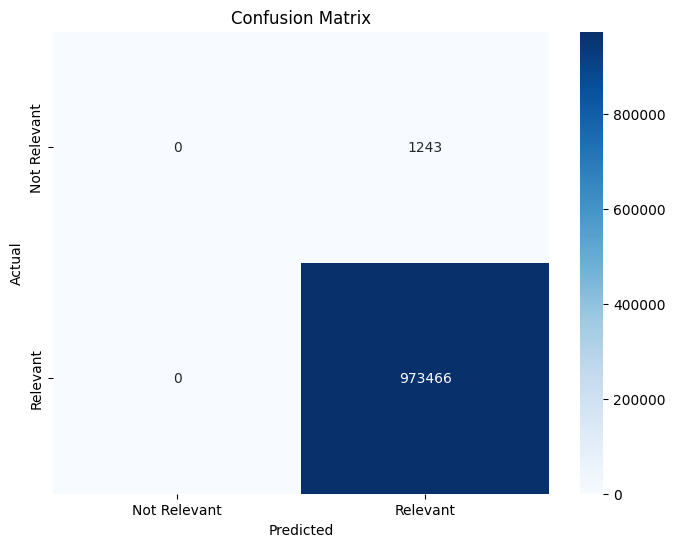

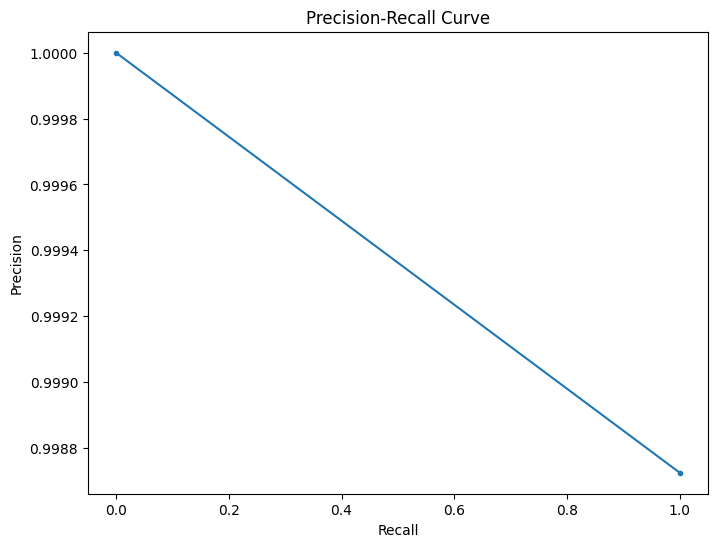

In [73]:
from surprise import accuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract true ratings and predicted ratings
true_ratings = [true_r[2] for true_r in testset]
predicted_ratings = [pred.est for pred in predictions]

# Convert ratings to binary outcomes with an adjusted threshold
threshold = 0.5
true_binary = [1 if rating >= threshold else 0 for rating in true_ratings]
pred_binary = [1 if rating >= threshold else 0 for rating in predicted_ratings]

# Calculate RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Calculate accuracy, recall, precision, and F1-score
accuracy_score_value = accuracy_score(true_binary, pred_binary)
recall_score_value = recall_score(true_binary, pred_binary)
precision_score_value = precision_score(true_binary, pred_binary, zero_division=1)
f1_score_value = f1_score(true_binary, pred_binary, zero_division=1)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'Accuracy: {accuracy_score_value}')
print(f'Recall: {recall_score_value}')
print(f'Precision: {precision_score_value}')
print(f'F1 Score: {f1_score_value}')

# Confusion Matrix
conf_matrix = confusion_matrix(true_binary, pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_binary, predicted_ratings)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
